In [1]:
%matplotlib inline

In [2]:
from vizztf import ZTFSNViz

In [3]:
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np

In [5]:
import sncosmo

In [6]:
# Read cadences:
def read_cadence(fname='/Users/rbiswas/Downloads/test_schedule_v3.db'):
    """read the output of a observing strategy simulation into a dataframe
    
    Paramameters
    ------------
    fname : str, optional
        absolute path to the observing stratgy simulation
    """
    fname = 'sqlite:///' + fname
    engine = create_engine(fname)
    df = pd.read_sql_table('Summary', con=engine)
    df.obsHistID = df.obsHistID.astype(np.int)
    df.set_index('obsHistID', inplace=True)
    df.expMJD = df.expMJD + 365 * 2 # ZTF is not done
    return df

In [7]:
def read_sim(fname='/Users/rbiswas/Downloads/sn_coord_time.dat'):
    df = pd.read_csv(fname,
                     skiprows=1, delim_whitespace=True,
                     names=('z', 'ra', 'dec', 't0'))
    #df.ra = df.ra * 360./24.0 - 180.
    df.t0 = df.t0 - 2400000.5
    return df
#df.groupby(['night']).sessionID.count().hist(histtype='step')
simsdf = read_sim()

In [8]:
simsdf.head()

,z,ra,dec,t0
0,0.150856,177.009298,-9.541729,58158.737911
1,0.193961,-142.895644,-16.445698,58171.555313
2,0.185266,104.668543,5.147820,58304.201365
3,0.101136,93.239688,81.126166,58232.383343
4,0.137615,39.767127,0.367004,58192.249369


In [9]:
df = read_cadence()

In [10]:
ztfsky = ZTFSNViz(showVisibleFields=True, showVarScatter=True,
                  data_dir='/Users/rbiswas/doc/projects/ZTF/data_year/')

In [11]:
ztfsky.show_var_scatter

True

In [12]:
import sncosmo

In [13]:
from astropy.cosmology import Planck15

In [14]:
ans = ztfsky.generate_var_scatter(58192.23, 'g', simsdf)

/Users/rbiswas/.local/lib/python2.7/site-packages/sncosmo-1.6.dev0-py2.7-macosx-10.6-x86_64.egg/sncosmo/models.py:187: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)
/Users/rbiswas/.local/lib/python2.7/site-packages/vizztf-0.0.1-py2.7.egg/vizztf/ztf.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simsdf['mag'] = mag
/Users/rbiswas/.local/lib/python2.7/site-packages/vizztf-0.0.1-py2.7.egg/vizztf/ztf.py:155: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  simsdf['x0'] = x0
/Users/rbiswas/.local/

In [15]:
ans

,z,ra,dec,t0,time,mag,x0,rad
0,0.150856,177.009298,-9.541729,58158.737911,33.492089,22.667118,0.000152,-0.066712
1,0.193961,-142.895644,-16.445698,58171.555313,20.674687,22.339334,0.000087,-0.033933
4,0.137615,39.767127,0.367004,58192.249369,-0.019369,19.773143,0.000186,0.222686
6,0.079323,145.126368,15.086576,58173.736473,18.493527,19.853502,0.000603,0.214650
11,0.187521,61.018721,44.505067,58204.929374,-12.699374,21.640655,0.000094,0.035934
13,0.183372,-3.115044,-8.048099,58216.880882,-24.650882,inf,0.000099,-inf
17,0.065480,-5.024452,74.521617,58189.437115,2.792885,18.172799,0.000902,0.382720
19,0.154315,72.271198,26.693921,58188.572476,3.657524,20.165850,0.000144,0.183415
21,0.098056,75.190509,-7.577146,58178.308402,13.921598,19.866972,0.000385,0.213303
22,0.193222,-9.585874,-17.186253,58203.191924,-10.961924,21.358967,0.000088,0.064103


In [16]:
def get_coords(obsHistID, df):
    ra, dec, mjd, band = df.loc[obsHistID, ['fieldRA', 'fieldDec','expMJD', 'filter']]
    ra, dec = np.degrees([ra, dec])
    return ra, dec, mjd, band


/usr/local/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


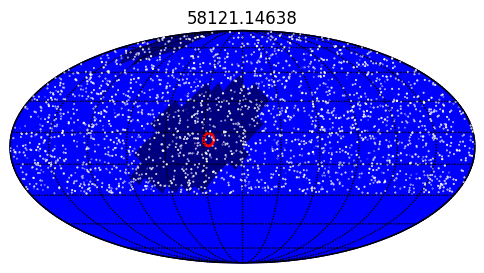

In [17]:
ra, dec, mjd, band = get_coords(1, df)
fig, ax = ztfsky.generate_image(ra, dec, 4., mjd, band=band, sndf=simsdf)

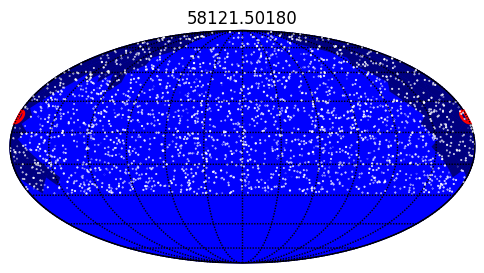

In [18]:
ra, dec, mjd, band = get_coords(682, df)
fig, ax = ztfsky.generate_image(ra, dec, 4., mjd, band=band, sndf=simsdf)